In [1]:
import numpy as np
import sys, os, git, lammps_logfile
import warnings
warnings.filterwarnings("ignore")

In [2]:
def sliding_average(data, window_size):
    """Calculate the sliding (moving) average of a dataset with edge handling."""
    pad_width = window_size // 2
    padded_data = np.pad(data, pad_width, mode='edge')
    smoothed_data = np.convolve(padded_data, np.ones(window_size) / window_size, mode='valid')
    return smoothed_data

In [ ]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
path_in_folder = current_path[len(git_path)+1:]
sys.path.append(git_path + "/.dependencies/pyplot-perso")
from plttools import PltTools
path_figures = current_path # git_path + "/figures/"
path_data = git_path + "/.dependencies/lammpstutorials-inputs/"+path_in_folder.split('/')[-2]+"/"

In [4]:
color0_light = np.array([0.5, 0.5, 0.5])
color1_light = np.array([1, 0.682, 0.286])
color2_light = np.array([0.008, 0.294, 0.478])
color3_light = np.array([0.267, 0.647, 0.761])

color0_dark = np.array([0.5, 0.5, 0.5])
color1_dark = np.array([1, 0.8, 0.5])
color2_dark = np.array([0.24, 0.58, 1.0])
color3_dark = np.array([0.4, 0.75, 0.85])

colors_light = {
    "color0": color0_light,
    "color1": color1_light,
    "color2": color2_light,
    "color3": color3_light,
}

colors_dark = {
    "color0": color0_dark,
    "color1": color1_dark,
    "color2": color2_dark,
    "color3": color3_dark,
}

In [5]:
log = lammps_logfile.File(path_data + "improved.md.log")
timestep = 0.005
time = log.get("Step")*timestep
population1 = log.get("v_n1_in")
population2 = log.get("v_n2_in")
coordination = log.get("c_sumcoor12") 

In [6]:
smoothed_time = sliding_average(time, 5)
smoothed_coordination = sliding_average(coordination, 5)

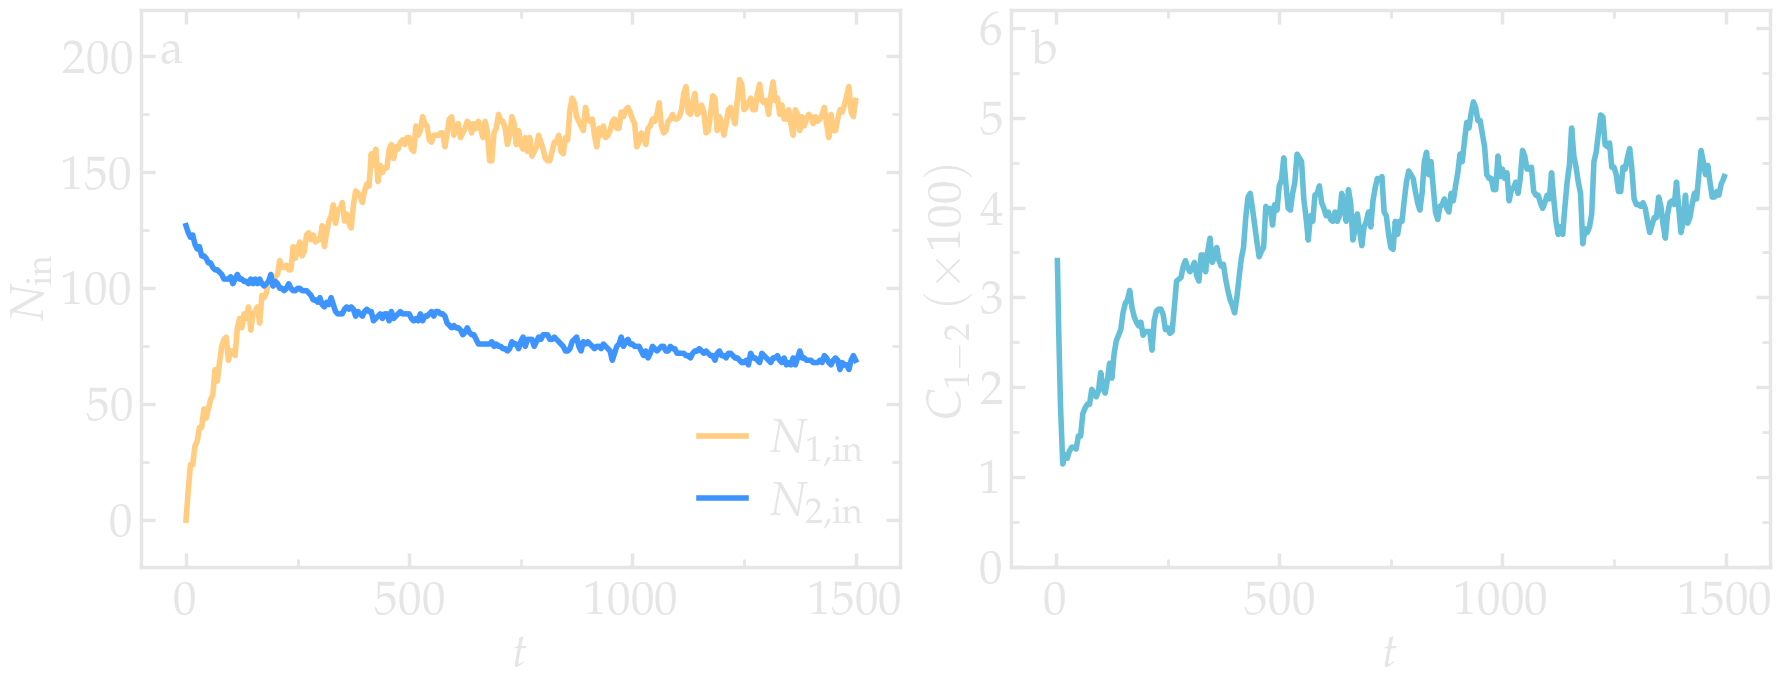

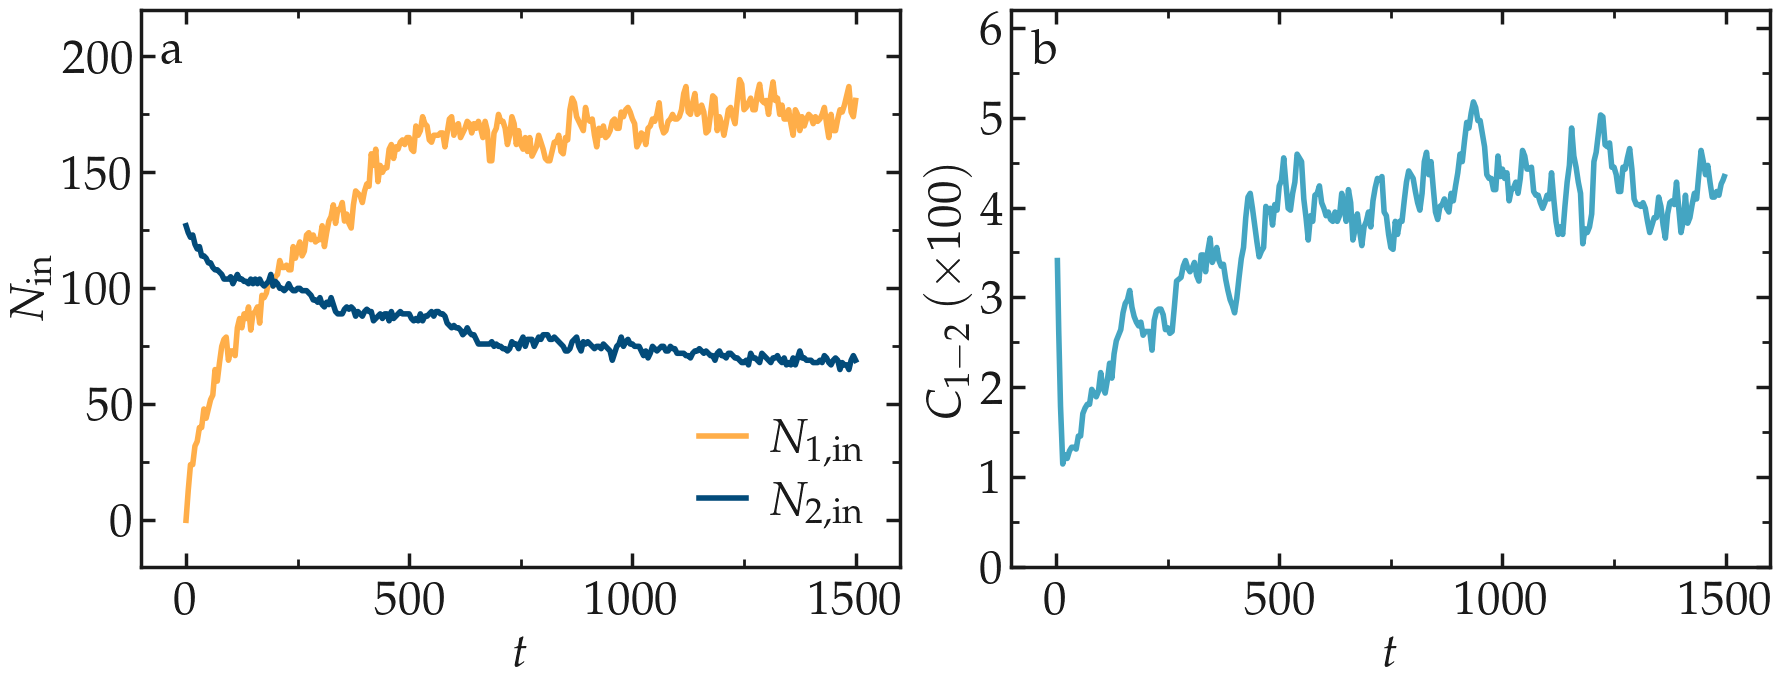

In [7]:
filename = "LJ-mixing"

for dark_mode in [True, False]:

    colors = colors_dark if dark_mode else colors_light
    globals().update(colors)

    # Initialise figure
    myplt = PltTools()
    myplt.prepare_figure(fig_size = (18,7), dark_mode = dark_mode,
                        transparency = True, use_serif=True, n_colone=2)
    # Panel a
    myplt.add_panel()
    myplt.add_plot(x = time, y = population1, type = "plot", linewidth_data = 3,
                marker = "-", data_color = color1, markersize = 12, data_label = r'$N_\mathrm{1,in}$')
    myplt.add_plot(x = time, y = population2, type = "plot", linewidth_data = 3,
                marker = "-", data_color = color2, markersize = 12, data_label = r'$N_\mathrm{2,in}$')
    myplt.complete_panel(ylabel = r'$N_\mathrm{in}$', xlabel = r'$t$',
                        xpad = 10, legend=True, handlelength_legend=1)
    myplt.set_boundaries(x_ticks=np.arange(0, 1501, 500), x_boundaries=(-100, 1600),
                        y_ticks=np.arange(0, 211, 50), y_boundaries=(-20, 220))
    # Panel b
    myplt.add_panel()
    myplt.add_plot(x = smoothed_time, y = smoothed_coordination*100, type = "plot", linewidth_data = 3,
                marker = "-", data_color = color3, markersize = 12)
    myplt.complete_panel(ylabel = r'$C_{1-2} ~ (\times 100)$', xlabel = r'$t$',
                        xpad = 10, legend=False, handlelength_legend=1)
    myplt.set_boundaries(x_ticks=np.arange(0, 1501, 500), x_boundaries=(-100, 1600),
                        y_ticks=np.arange(0, 6.1, 1), y_boundaries=(0, 6.2))
    # Print figure
    myplt.add_subplotlabels()
    myplt.save_figure(filename = filename, saving_path = path_figures)